In [1]:
import pandas as pd

In [2]:
file_path = "Customer_Churn_Data_Large.xlsx"

xls = pd.ExcelFile(file_path)
xls.sheet_names

['Customer_Demographics',
 'Transaction_History',
 'Customer_Service',
 'Online_Activity',
 'Churn_Status']

The Excel file contains multiple sheets related to customer churn analysis:

1. Customer_Demographics – Contains customer profile information (age, gender, location, etc.).
2. Transaction_History – Includes purchase frequency, recency, and monetary value.
3. Customer_Service – Captures support interactions, complaints, and resolutions.
4. Online_Activity – Details digital interactions such as website visits and app usage.
5. Churn_Status – Specifies whether a customer has churned or remained active

In [3]:
sheets_preview = {sheet: xls.parse(sheet).head() for sheet in xls.sheet_names}
sheets_preview

{'Customer_Demographics':    CustomerID  Age Gender MaritalStatus IncomeLevel
 0           1   62      M        Single         Low
 1           2   65      M       Married         Low
 2           3   18      M        Single         Low
 3           4   21      M       Widowed         Low
 4           5   21      M      Divorced      Medium,
 'Transaction_History':    CustomerID  TransactionID TransactionDate  AmountSpent ProductCategory
 0           1           7194      2022-03-27       416.50     Electronics
 1           2           7250      2022-08-08        54.96        Clothing
 2           2           9660      2022-07-25       197.50     Electronics
 3           2           2998      2022-01-25       101.31       Furniture
 4           2           1228      2022-07-24       397.37        Clothing,
 'Customer_Service':    CustomerID  InteractionID InteractionDate InteractionType ResolutionStatus
 0           1           6363      2022-03-31         Inquiry         Resolved
 1  

Here's an overview of the dataset:

- Customer_Demographics: Contains customer details like age, gender, marital status, and income level.
- Transaction_History: Includes purchase records with transaction ID, date, amount spent, and product category.
- Customer_Service: Captures customer support interactions, their type, and resolution status.
- Online_Activity: Tracks login activity, frequency, and service usage (e.g., mobile app, website).
- Churn_Status: Specifies whether a customer has churned (1) or remains active (0).

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all sheets into dataframes
df_demo = xls.parse('Customer_Demographics')
df_trans = xls.parse('Transaction_History')
df_service = xls.parse('Customer_Service')
df_online = xls.parse('Online_Activity')
df_churn = xls.parse('Churn_Status')

In [5]:
df_demo.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [6]:
df_trans.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [7]:
df_service.head()

,CustomerID,InteractionID,InteractionDate,InteractionType,ResolutionStatus
0,1,6363,2022-03-31,Inquiry,Resolved
1,2,3329,2022-03-17,Inquiry,Resolved
2,3,9976,2022-08-24,Inquiry,Resolved
3,4,7354,2022-11-18,Inquiry,Resolved
4,4,5393,2022-07-03,Inquiry,Unresolved


In [8]:
df_online.head()

,CustomerID,LastLoginDate,LoginFrequency,ServiceUsage
0,1,2023-10-21,34,Mobile App
1,2,2023-12-05,5,Website
2,3,2023-11-15,3,Website
3,4,2023-08-25,2,Website
4,5,2023-10-27,41,Website


In [9]:
df_churn.head()

,CustomerID,ChurnStatus
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [10]:
# Check missing values across datasets
missing_values = {
    "Customer_Demographics": df_demo.isnull().sum(),
    "Transaction_History": df_trans.isnull().sum(),
    "Customer_Service": df_service.isnull().sum(),
    "Online_Activity": df_online.isnull().sum(),
    "Churn_Status": df_churn.isnull().sum(),
}

for missing_value in missing_values:
    print(f"\n{missing_value}:\n{missing_values[missing_value]}")


Customer_Demographics:
CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

Transaction_History:
CustomerID         0
TransactionID      0
TransactionDate    0
AmountSpent        0
ProductCategory    0
dtype: int64

Customer_Service:
CustomerID          0
InteractionID       0
InteractionDate     0
InteractionType     0
ResolutionStatus    0
dtype: int64

Online_Activity:
CustomerID        0
LastLoginDate     0
LoginFrequency    0
ServiceUsage      0
dtype: int64

Churn_Status:
CustomerID     0
ChurnStatus    0
dtype: int64


In [11]:
# Generate summary statistics for numerical columns
summary_stats = {
    "Customer_Demographics": df_demo.describe(),
    "Transaction_History": df_trans.describe(),
    "Online_Activity": df_online.describe(),
}

In [12]:
for summary_stat in summary_stats:
    print(summary_stats[summary_stat])
    print("\n")

        CustomerID          Age
count  1000.000000  1000.000000
mean    500.500000    43.267000
std     288.819436    15.242311
min       1.000000    18.000000
25%     250.750000    30.000000
50%     500.500000    43.000000
75%     750.250000    56.000000
max    1000.000000    69.000000


        CustomerID  TransactionID                TransactionDate  AmountSpent
count  5054.000000    5054.000000                           5054  5054.000000
mean    501.424218    5510.538979  2022-07-01 19:25:37.158686208   250.707351
min       1.000000    1000.000000            2022-01-01 00:00:00     5.180000
25%     251.000000    3242.000000            2022-04-03 00:00:00   127.105000
50%     506.000000    5530.000000            2022-07-01 00:00:00   250.525000
75%     749.000000    7680.750000            2022-09-29 00:00:00   373.412500
max    1000.000000    9997.000000            2022-12-31 00:00:00   499.860000
std     285.172780    2582.088012                            NaN   142.250838


      

C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_6632\3718475156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ChurnStatus", data=df_churn, palette="pastel")


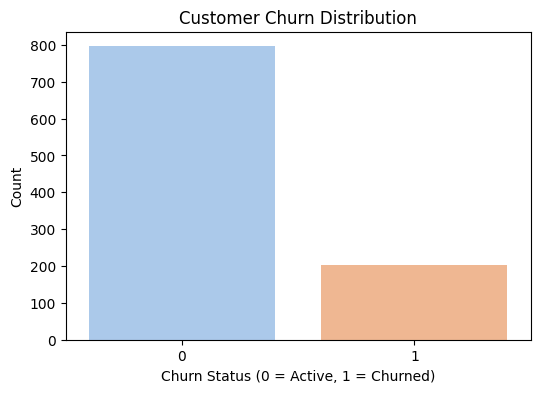

In [13]:
# Visualize churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="ChurnStatus", data=df_churn, palette="pastel")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
plt.ylabel("Count")
plt.show()

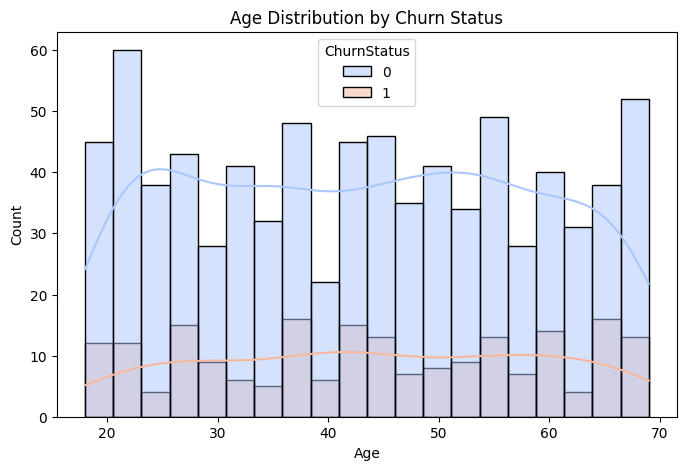

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df_demo.merge(df_churn, on="CustomerID"), x="Age", hue="ChurnStatus", kde=True, bins=20, palette="coolwarm")
plt.title("Age Distribution by Churn Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_6632\1394360936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_churn["ChurnStatus"], y=df_trans["AmountSpent"], palette="Set2")


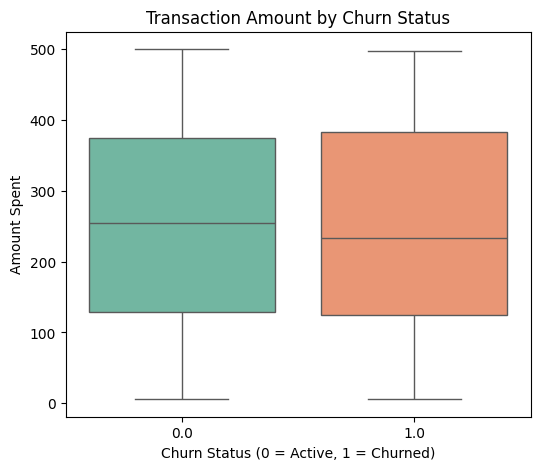

In [15]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df_churn["ChurnStatus"], y=df_trans["AmountSpent"], palette="Set2")
plt.title("Transaction Amount by Churn Status")
plt.xlabel("Churn Status (0 = Active, 1 = Churned)")
plt.ylabel("Amount Spent")
plt.show()


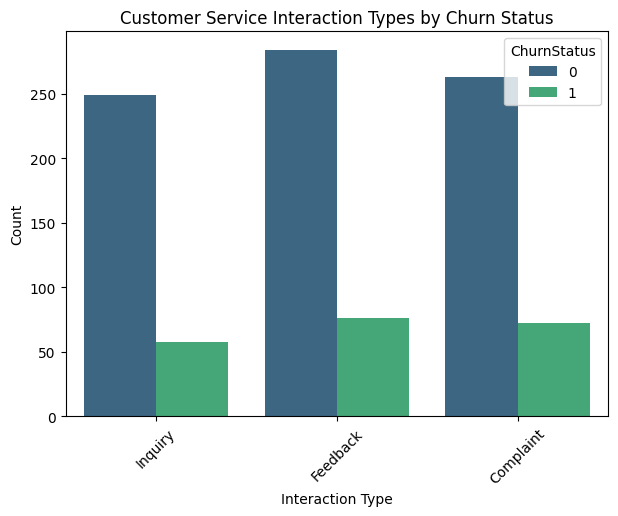

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_service.merge(df_churn, on="CustomerID"), x="InteractionType", hue="ChurnStatus", palette="viridis")
plt.title("Customer Service Interaction Types by Churn Status")
plt.xlabel("Interaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


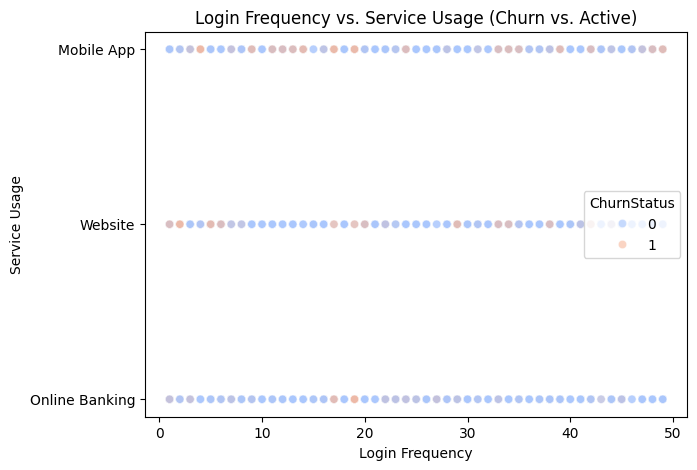

In [17]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_online.merge(df_churn, on="CustomerID"), x="LoginFrequency", y="ServiceUsage", hue="ChurnStatus", palette="coolwarm", alpha=0.6)
plt.title("Login Frequency vs. Service Usage (Churn vs. Active)")
plt.xlabel("Login Frequency")
plt.ylabel("Service Usage")
plt.show()


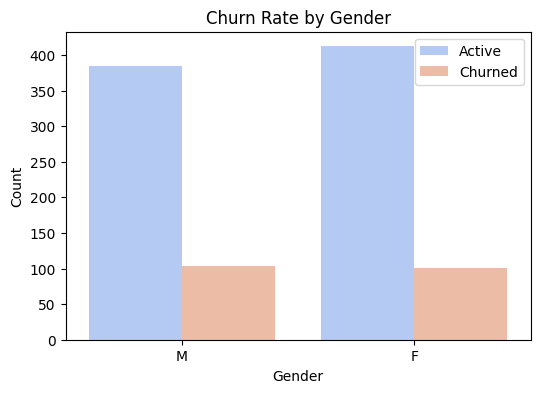

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_demo.merge(df_churn, on="CustomerID"), x="Gender", hue="ChurnStatus", palette="coolwarm")
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Active", "Churned"])
plt.show()


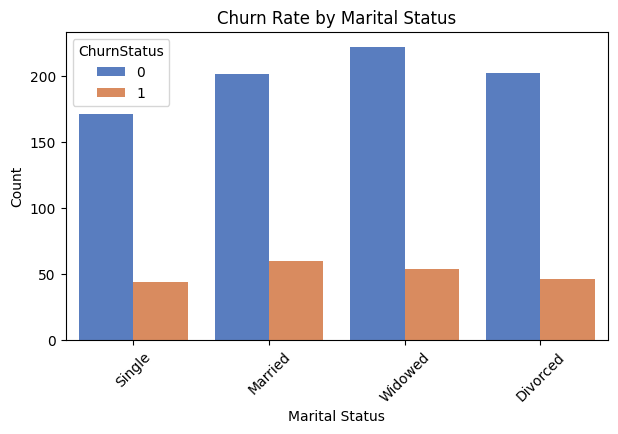

In [19]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df_demo.merge(df_churn, on="CustomerID"), x="MaritalStatus", hue="ChurnStatus", palette="muted")
plt.title("Churn Rate by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_6632\2934804010.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_trans_merged, x="TransactionDate", y="AmountSpent", hue="ChurnStatus", palette="coolwarm", ci=None)


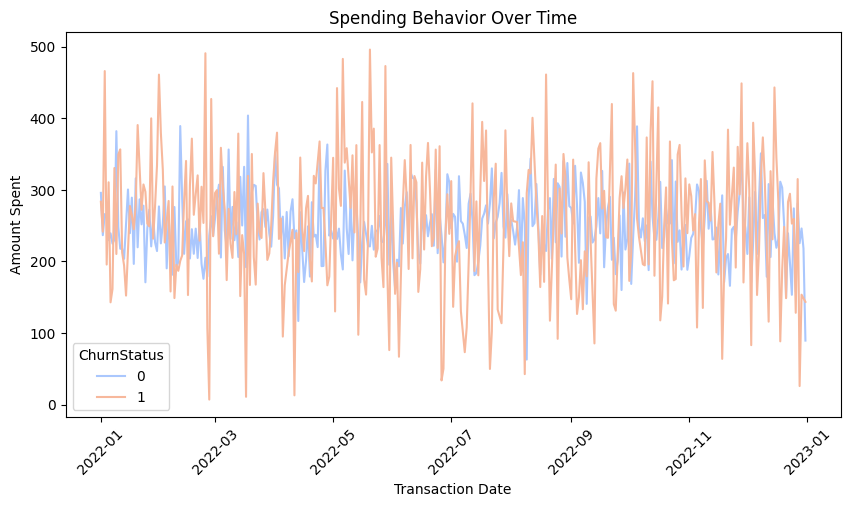

In [20]:
df_trans['TransactionDate'] = pd.to_datetime(df_trans['TransactionDate'])
df_trans_merged = df_trans.merge(df_churn, on="CustomerID")

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_trans_merged, x="TransactionDate", y="AmountSpent", hue="ChurnStatus", palette="coolwarm", ci=None)
plt.title("Spending Behavior Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Amount Spent")
plt.xticks(rotation=45)
plt.show()


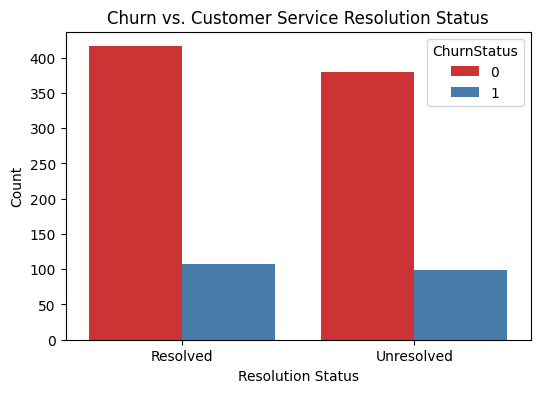

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_service.merge(df_churn, on="CustomerID"), x="ResolutionStatus", hue="ChurnStatus", palette="Set1")
plt.title("Churn vs. Customer Service Resolution Status")
plt.xlabel("Resolution Status")
plt.ylabel("Count")
plt.show()


C:\Users\Eda AYDIN\AppData\Local\Temp\ipykernel_6632\4281492713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clv, x="ChurnStatus", y="AmountSpent", palette="coolwarm")


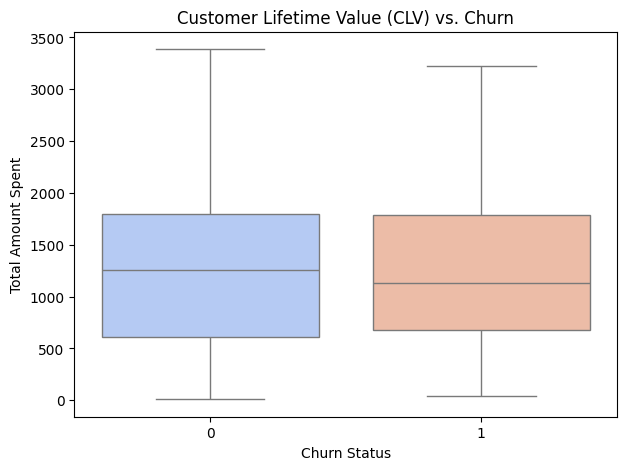

In [22]:
df_clv = df_trans.groupby("CustomerID")["AmountSpent"].sum().reset_index()
df_clv = df_clv.merge(df_churn, on="CustomerID")

plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clv, x="ChurnStatus", y="AmountSpent", palette="coolwarm")
plt.title("Customer Lifetime Value (CLV) vs. Churn")
plt.xlabel("Churn Status")
plt.ylabel("Total Amount Spent")
plt.show()


Initial Findings from EDA:
1. Missing Values: No missing values were found in any dataset, which simplifies preprocessing.
2. Churn Distribution: The dataset contains both churned (1) and active (0) customers, allowing for balanced analysis.
3. Customer Demographics:
   1. Age ranges from 18 to 69 years, with an average of 43.27.
4. Transaction History:
   1. Average amount spent per transaction is $250.71, with a range of $5.18 to $499.86.
   2. The dataset contains 5054 transactions from 1000 unique customers.
5. Online Activity:
   1. Customers log in on average 25.91 times, with a minimum of 1 and a maximum of 49.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
num_cols = ['Age', 'AmountSpent', 'LoginFrequency']
cat_cols = ['Gender', 'MaritalStatus', 'ProductCategory', 'InteractionType', 'ResolutionStatus']


In [24]:
# Standardize numerical features
scaler = StandardScaler()
df_demo['Age'] = scaler.fit_transform(df_demo[['Age']])
df_trans['AmountSpent'] = scaler.fit_transform(df_trans[['AmountSpent']])
df_online['LoginFrequency'] = scaler.fit_transform(df_online[['LoginFrequency']])

In [25]:
# Merge relevant columns from other dataframes
df_final = df_demo[['CustomerID', 'Gender', 'MaritalStatus']] \
    .merge(df_trans[['CustomerID', 'ProductCategory']], on='CustomerID', how='left') \
    .merge(df_service[['CustomerID', 'InteractionType', 'ResolutionStatus']], on='CustomerID', how='left')

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_cats = pd.get_dummies(df_final[cat_cols + ['CustomerID']], drop_first=True)

In [26]:
df_final.head()

,CustomerID,Gender,MaritalStatus,ProductCategory,InteractionType,ResolutionStatus
0,1,M,Single,Electronics,Inquiry,Resolved
1,2,M,Married,Clothing,Inquiry,Resolved
2,2,M,Married,Electronics,Inquiry,Resolved
3,2,M,Married,Furniture,Inquiry,Resolved
4,2,M,Married,Clothing,Inquiry,Resolved


In [27]:
df_final.to_csv("Customer_Churn_Preprocessed.csv", index=False)